In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
class Graph :
    def __init__(self):
        self.varFirst = []
        self.varSecond = []
        self.op = []
        self.weigths =[]
        self.neig=[]
        self.data = []
        self.graph = []
        self.lastOp = None
    def addOperation(self,X,Y,operation):
        self.obj = PlaceHolder(X)
        self.Input = PlaceHolder(Y)
        self.oper=eval(operation)(self.obj,self.Input)
        self.obj.appendN(Y)
        self.obj.appendN(self.oper)
        self.Input.appendN(X)
        self.Input.appendN(self.oper)
        #self.varFirst.append(self.obj)
        #self.varSecond.append(self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
        #self.createFrame()
    def combineOperation(self,opIndex,X,operation):
        self.obj = self.op[opIndex]
        self.Input = PlaceHolder(X)
        self.oper=eval(operation)(PlaceHolder(self.op[opIndex].name),self.Input)
        self.obj.neighboors.append(X)
        self.obj.neighboors.append(self.oper)
        self.Input.appendN(self.obj)
        self.Input.appendN(self.oper)
        #self.varFirst.append(self.obj.result)
        #self.varSecond.append(self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
    def combineFull(self,opIndex,X,operation):
        self.obj = self.op[opIndex]
        self.Input = self.op[X]
        self.oper=eval(operation)(PlaceHolder(self.op[opIndex].name),PlaceHolder(self.op[X].name))
        self.obj.neighboors.append(self.Input)
        self.obj.neighboors.append(self.oper)
        self.Input.neighboors.append(self.obj)
        self.Input.neighboors.append(self.oper)
        #self.varFirst.append(self.obj.result)
        #self.varSecond.append(self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
    def connections(self,X,Y,Z):
        self.graph.append([X.nodeName,Z.nodeName,float(X.name)])
        self.graph.append([Y.nodeName,Z.nodeName,float(Y.name)])
        self.lastOp = Z
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        self.graph.append([self.graph[-1][1],'Result',self.lastOp.name])
        G = nx.DiGraph()
        G.add_weighted_edges_from(self.graph)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(G,'weight'))

In [15]:
class Multi:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = [self.x,self.y]
        self.name = float(self.x.name) * float(self.y.name)
        self.nodeName = '*'
class Sub:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = [self.x,self.y]
        self.name = float(self.x.name) - float(self.y.name)
        self.nodeName = '-'
class Div:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = [self.x,self.y]
        self.name = float(self.x.name) / float(self.y.name)
        self.nodeName = '/'
class Add:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = [self.x,self.y]
        self.name = float(self.x.name) + float(self.y.name)
        self.nodeName = '+'
class PlaceHolder:
    def __init__(self,X):
        self.neighboors = []
        self.name = str(X)
        self.nodeName = str(X)
    def appendN(self,Y):
        self.neighboors.append(Y)

In [18]:
G = Graph()
G.addOperation(10,20,'Multi')
G.combineOperation(0,40,'Add')
G.combineOperation(1,22,'Div')
G.combineOperation(2,10,'Add')
G.addOperation(32,2,'Div')
G.combineFull(4,3,'Sub')


df =pd.DataFrame(G.data) 
df.head(6)



,First Variable,Operation,Second Variable
0,10,Multi,20
1,200,Add,40
2,240,Div,22
3,10.9091,Add,10
4,32,Div,2
5,16,Sub,20.9091


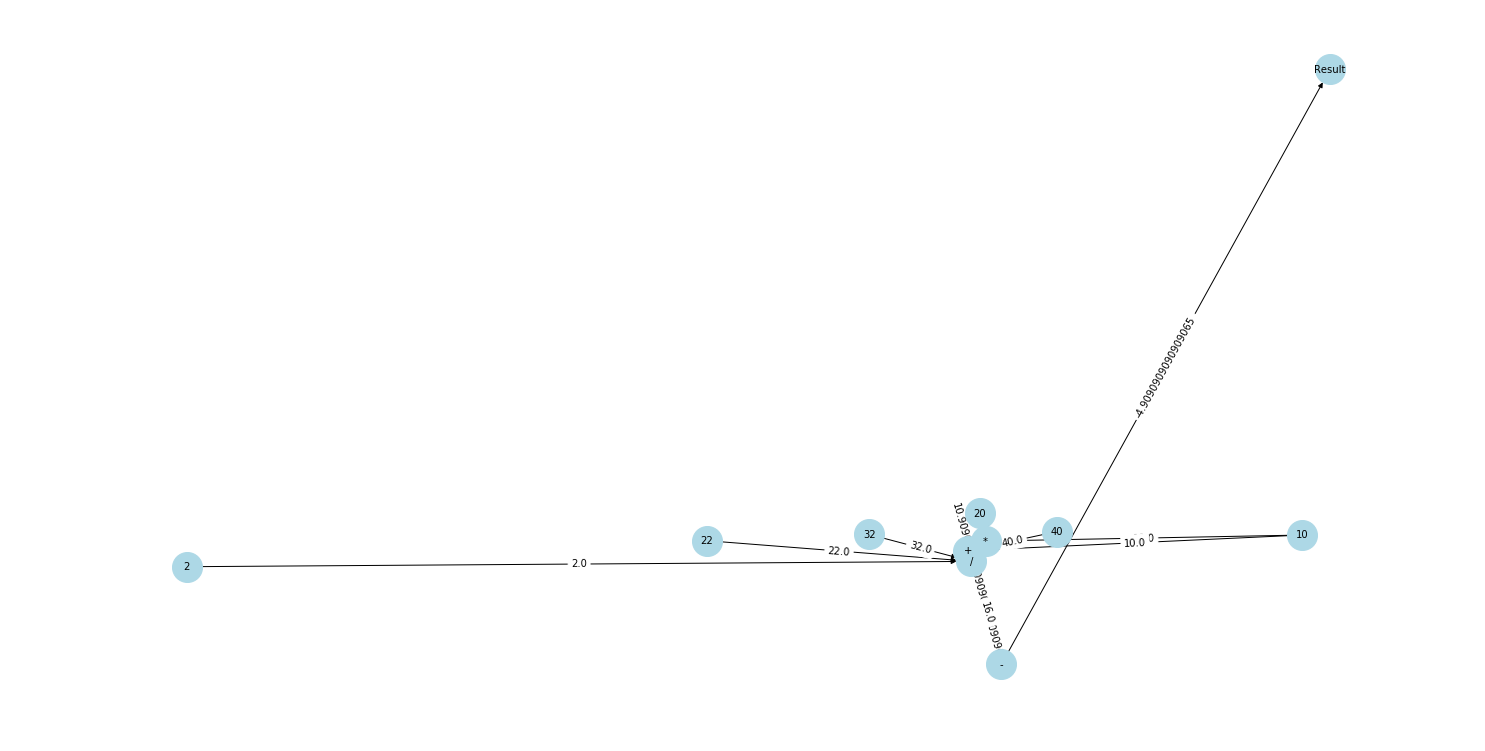

In [19]:
G.draw()